In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.linalg
from sympy import *
#from sympy.abc import a,b
init_printing()
import math
from sympy.printing.theanocode import theano_function
from matplotlib import pyplot as plt
from pyphysim.util.misc import randn_c


In [2]:
# a,b = symbols('a b', complex=True)

$\newcommand\vtW{\mathbf{w}}$
$\newcommand\vtP{\mathbf{p}}$
$\newcommand\mtR{\mathbf{R}}$

The Winer solution is given by $\vtW = \mtR^{-1}\vtP$

$$\mtR = \begin{bmatrix}
     r[0] & r[1] \\
     r[-1] & r[0]
     \end{bmatrix}$$

In [3]:
# M = 2
# h = Matrix([a, b], size=(2,1))
# h

In [4]:
# def idx_h(i):
#     """Indexa h retornando um elemento de h ou zero caso o índice caia fora."""
#     if i < 0: return 0
#     if i > h.size-1: return 0
#     return h[i]

# def r(m):
#     out = idx_h(0) * idx_h(-m).conjugate()
#     for i in range(1, M):
#         out = out + idx_h(i) * idx_h(i-m).conjugate()
#     return out

In [5]:
# R = Matrix([[r(0), r(1)], [r(-1), r(0)]])
# R = R.subs(a*a.conjugate(),abs(a)**2).subs(b*b.conjugate(),abs(b)**2)

In [6]:
# Rdet = R.det()
# Rdet

In [7]:
# Rinv = R.inv()
# Rinv.simplify()
# Rinv.subs(a*b*a.conjugate()*b.conjugate(), abs(a*b)**2)

In [8]:
# m,n,o,p = symbols("m n o p")
# M = Matrix([[m,n],[o,p]])
# Minv = M.inv()
# Minv.simplify()
# M

In [9]:
# Minv

# Item e

In [10]:
# def calc_y(data):
#     out = np.zeros_like(data)
#     for n in range(data.size):
#         for i in range(2):
#             if n-i >= 0:
#                 out[n] = out[n] + h[i]*data[n-i]
#     return out

In [11]:
# h = np.array([4, -5])

# def idx_h(i):
#     """Indexa h retornando um elemento de h ou zero caso o índice caia fora."""
#     if i < 0: return 0
#     if i > h.size-1: return 0
#     return h[i]

# def r(m):
#     out = idx_h(0) * idx_h(-m).conjugate()
#     for i in range(1, M):
#         out = out + idx_h(i) * idx_h(i-m).conjugate()
#     return out

In [168]:
def compute_MSE(M, h):

    #r_vec = np.vectorize(r)
    #A = np.fromfunction(lambda x,y:-x+y, shape=(M,M), dtype=int)
    #A

    corr = np.correlate(h, h, 'full')
    #print(corr)
    corr = corr[corr.size//2:]
    
    R = sp.linalg.toeplitz(np.hstack([corr, np.zeros(M-h.size)]))
    #R = r_vec(A)
    #print(R)
    p = np.hstack([np.zeros(M-h.size), h[::-1]])
    #print(p)

    w = np.linalg.inv(R) @ p
    #print(w)

    data = randn_c(3500)
    y = np.convolve(data, h)
    
    tilde_y = np.convolve(w.conj(),y)
    
#     print(data.size)
#     print(y.size)
#     print(tilde_y.size)
    
    mean_mse = math.sqrt(np.mean(  np.abs(data - tilde_y[M-1:-h.size+1]  )**2))
    return mean_mse

In [169]:
h = np.array([4,-5])
compute_MSE(50, h)

<IPython.core.display.Javascript object>


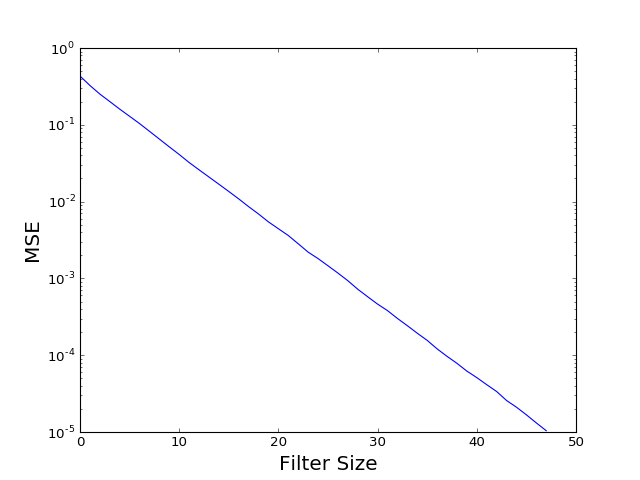

In [170]:
mean_mse_for_all_M = np.array(list(compute_MSE(i, h) for i in range(3,51)))

plt.semilogy(mean_mse_for_all_M)
plt.ylabel("MSE", fontsize=18)
plt.xlabel("Filter Size", fontsize=18);
plt.savefig("mse_for_varying_M.pdf")